
# Build Your Own Dynamic Array (Beginner‑Friendly)

In this notebook you'll **recreate a Python list-like data structure** from scratch and watch how it grows.
This is a great way to learn about **arrays, resizing, and amortized cost**—all with simple, readable code.

### What you'll learn
- What a **dynamic array** is and why we need it
- How `append` works behind the scenes (capacity doubling)
- How to **measure capacity growth** and visualize it



## 1) Concept: What is a dynamic array?
A **dynamic array** starts with a small amount of space (capacity). When you keep adding items with `append`, it eventually **runs out of room**.
At that moment, it **allocates a bigger block** (usually **double** the old size), **copies** the old elements into it, and continues.

This strategy keeps `append` **fast on average**—even though the occasional resize does extra work.



## 2) Starter code
Below is the exact class you'll be working with.

Run the cell to define `DynamicArray`.


In [1]:
import ctypes  # provides low-level arrays


class DynamicArray:
    """A dynamic array class akin to a simplified Python list."""

    def __init__(self):
        """Create an empty array."""
        self._n = 0                      # count actual elements
        self._capacity = 1               # default array capacity
        self._A = self._make_array(self._capacity)  # low-level array

    def __len__(self):
        """Return number of elements stored in the array."""
        return self._n

    def __getitem__(self, k):
        """Return element at index k."""
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]                # retrieve from array

    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:                # not enough room
            self._resize(2 * self._capacity)         # so double capacity
        self._A[self._n] = obj
        self._n += 1

    def _resize(self, c):
        """Resize internal array to capacity c."""
        B = self._make_array(c)                      # new (bigger) array
        for k in range(self._n):                     # for each existing value
            B[k] = self._A[k]
        self._A = B                                  # use the bigger array
        self._capacity = c

    def _make_array(self, c):
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()


### Quick sanity check
Let's exercise the class briefly—this is the same example provided.


In [2]:
# Example usage (runs without error)
if __name__ == "__main__":
    arr = DynamicArray()
    for i in range(10):
        arr.append(i)
    print("Length:", len(arr))
    print("Contents:", [arr[i] for i in range(len(arr))])


Length: 10
Contents: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



## 3) Peek inside the array
To **see** what's happening, we'll make a *debug* version that exposes the current **capacity** and prints a message whenever we resize.
> This keeps your original class intact while giving us visibility for learning.


In [ ]:
class DynamicArrayDebug(DynamicArray):
    def capacity(self):
        """Return current capacity (number of slots allocated)."""
        return self._capacity

    def _resize(self, c):
        print(f"-----\n[resize] capacity {self._capacity} -> {c}\n-----\n")
        super()._resize(c)


d = DynamicArrayDebug()
for i in range(12):
    d.append(i)
    print(f"i={i:2d}  len={len(d):2d}  capacity={d.capacity():2d}\n")
print(f"d is now:  {[d[i] for i in range(len(d))]}")


i= 0  len= 1  capacity= 1

-----
[resize] capacity 1 -> 2
-----

i= 1  len= 2  capacity= 2

-----
[resize] capacity 2 -> 4
-----

i= 2  len= 3  capacity= 4

i= 3  len= 4  capacity= 4

-----
[resize] capacity 4 -> 8
-----

i= 4  len= 5  capacity= 8

i= 5  len= 6  capacity= 8

i= 6  len= 7  capacity= 8

i= 7  len= 8  capacity= 8

-----
[resize] capacity 8 -> 16
-----

i= 8  len= 9  capacity=16

i= 9  len=10  capacity=16

i=10  len=11  capacity=16

i=11  len=12  capacity=16

d is now:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]



## 4) Record capacity growth
Let's systematically record how **capacity** changes as we append many elements.


In [10]:
import pandas as pd

def record_growth(n=64):
    d = DynamicArrayDebug()
    rows = []
    last_cap = d.capacity()
    rows.append({"step": 0, "len": len(d), "capacity": last_cap})
    for i in range(1, n+1):
        d.append(i)
        cap = d.capacity()
        if cap != last_cap:
            # log only on capacity change to keep the table small
            rows.append({"step": i, "len": len(d), "capacity": cap})
            last_cap = cap
    return pd.DataFrame(rows)

growth_df = record_growth(128)
growth_df


-----
[resize] capacity 1 -> 2
-----

-----
[resize] capacity 2 -> 4
-----

-----
[resize] capacity 4 -> 8
-----

-----
[resize] capacity 8 -> 16
-----

-----
[resize] capacity 16 -> 32
-----

-----
[resize] capacity 32 -> 64
-----

-----
[resize] capacity 64 -> 128
-----



,step,len,capacity
0,0,0,1
1,2,2,2
2,3,3,4
3,5,5,8
4,9,9,16
5,17,17,32
6,33,33,64
7,65,65,128



## 5) Visualize the growth
We'll make a simple plot of **capacity** against the number of **appends** (step).
> Notice the **doubling pattern**.


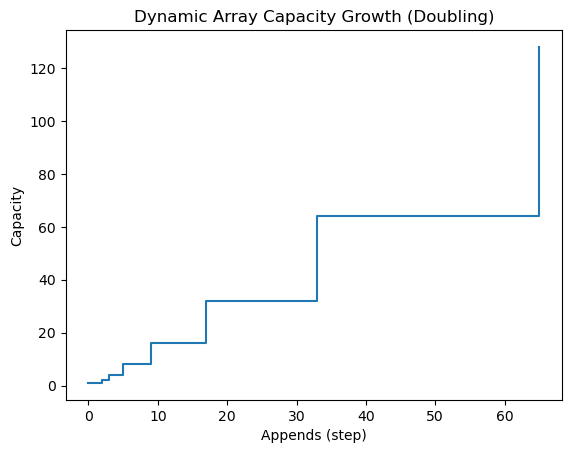

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.step(growth_df["step"], growth_df["capacity"], where="post")
plt.xlabel("Appends (step)")
plt.ylabel("Capacity")
plt.title("Dynamic Array Capacity Growth (Doubling)")
plt.show()



## 6) Key takeaways
- A dynamic array hides the complexity of **resizing** so that `append` is **fast on average**.
- When capacity is full, we allocate a **bigger block** (often **double**), copy old items, and continue.
- This strategy gives `append` an **amortized O(1)** time complexity, even though individual resizes do extra work.
